Looking into https://github.com/ME-ICA/tedana/issues/556

In [1]:
%matplotlib inline
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

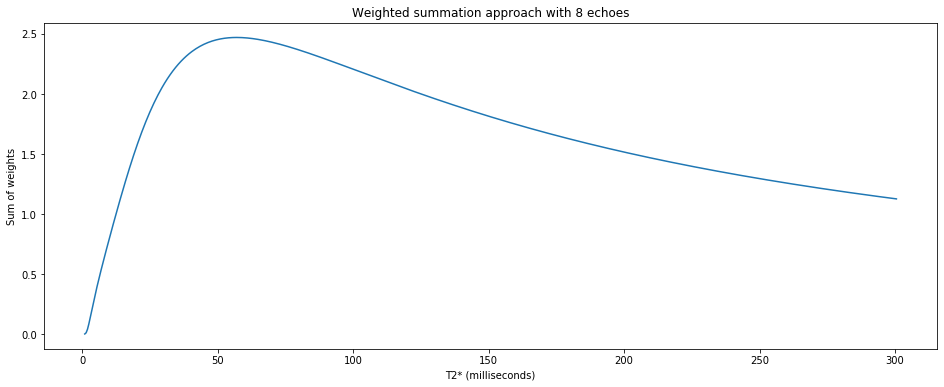

In [2]:
tes = np.array([9.58, 21.95, 34.32, 46.69, 59.06, 71.43, 83.8, 96.17])
tes = tes[:, None]
t2s = np.arange(1, 301, 0.5)[None, :]

alpha = tes * np.exp(-tes / t2s)
alpha2 = (tes / t2s) * np.exp(-tes / t2s)
total_weight = np.sum(alpha2, axis=0)
fig, ax = plt.subplots(figsize=(16, 6))
ax.plot(np.squeeze(t2s), total_weight)
ax.set_ylabel('Sum of weights')
ax.set_xlabel('T2* (milliseconds)')
ax.set_title('Weighted summation approach with 8 echoes')
fig.savefig('example.png')

In [3]:
# Where's the max in the curve? Is it somewhere that makes sense?
t2s[0, np.where(total_weight == np.max(total_weight))[0][0]]

57.0

In [4]:
# It's not the mean echo time
np.mean(tes)

52.875

In [5]:
# Normalized versions of weights in tedana and weights from Posse are the same
print(alpha[:, 10] / np.sum(alpha[:, 10]))
print(alpha2[:, 10] / np.sum(alpha2[:, 10]))

[7.34489660e-01 2.14133317e-01 4.26016620e-02 7.37450171e-03
 1.18694827e-03 1.82662141e-04 2.72672572e-05 3.98168221e-06]
[7.34489660e-01 2.14133317e-01 4.26016620e-02 7.37450171e-03
 1.18694827e-03 1.82662141e-04 2.72672572e-05 3.98168221e-06]
